# Examples for WIMpy_NREFT

Example notebook to go with the `WIMpy_NREFT` code, available [here](https://github.com/bradkav/WIMpy_NREFT). 

This notebook let's you calculate and plot recoil spectra $\mathrm{d}R/\mathrm{d}E_R$ for a range of interactions, relevant for the direct detection of Dark Matter. In particular, we focus on the non-relativistic effective field theory (NREFT) of direct detection. 

Don't know how to use a Jupyter notebook? [Try this link](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html), or just hit `Shift+Enter` over and over again to run the cells...

#### References

For a review of the general 'direct detection' formalism, see [arXiv:1002.1912](https://arxiv.org/abs/1002.1912).

For more information about the NREFT, see e.g. [arXiv:1203.3542](https://arxiv.org/abs/1203.3542) and [arXiv:1307.5955](https://arxiv.org/abs/1307.5955).

#### Contents

 * [Getting started with WIMpy](#Getting-started-with-WIMpy)
 * [Standard spin-independent interactions](#Spin-independent-interactions)
 * [Comparing spin-indepedent and spin-dependent interactions](#Comparing-$\mathcal{O}_1$-and-$\mathcal{O}_4$)
 * [Non-relativistic effective field theory (NREFT) spectra](#Random-NREFT-spectra)
 * [Specific interactions (millicharge, magnetic dipole, etc.)](#Specific-interactions)
 * [Using different nuclear targets](#Different-targets)
 
 ------------

# Getting started with WIMpy

The main functions are in `DMUtils.py`, which is loaded like this:

In [1]:
import WIMpy
from WIMpy import DMUtils as DMU
print(WIMpy.__version__)

1.1.1


We'll also load a bunch of useful libraries (numpy, matplotlib, etc.):

In [2]:
%matplotlib inline

In [3]:
#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as pl

import matplotlib as mpl

font = {'family' : 'sans-serif',
        'size'   : 16}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

from tqdm import tqdm
from scipy.integrate import quad
from scipy.special import erf

List the available nuclear targets:

In [4]:
print(DMU.target_list)

['H' 'He3' 'He4' 'C12' 'N14' 'O16' 'F19' 'Ne20' 'Na23' 'Mg24' 'Al27'
 'Si28' 'S32' 'Ar40' 'Ca40' 'Fe56' 'Ni58' 'Ge70' 'Ge72' 'Ge73' 'Ge74'
 'Ge76' 'I127' 'Xe128' 'Xe129' 'Xe130' 'Xe131' 'Xe132' 'Xe134' 'Xe136']


---------------
# Spin-independent interactions

#### Differential recoil rate

Before we calculate the differential recoil rate $\mathrm{d}R/\mathrm{d}E_R$, we have to specify the couplings. We do this by defining two vectors of couplings: 1 for the couplings to protons and 1 for the couplings to neutrons. Each vector should have 15 elements (one entry for each of the 15 NREFT operators - note that $\mathcal{O}_2$ is set to zero by default, but we keep 15 entries so that the numbering matches): 

In [5]:
#Initialise the empty vectors
cp = np.zeros(15)
cn = np.zeros(15)

Let's start with the standard spin-independent interaction (so we want to set the first element $\mathcal{O}_1$, noting that the numbering of arrays starts from zero in python):

In [6]:
cp[0] = 1e-9/(246.2)**2
cn[0] = 1e-9/(246.2)**2
print("Couplings to protons [GeV^{-2}]:", cp)
print("Couplings to neutrons [GeV^{-2}]:", cn)

Couplings to protons [GeV^{-2}]: [1.6497719e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
Couplings to neutrons [GeV^{-2}]: [1.6497719e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


**Note that the couplings in the NREFT are *dimensionful* and should have units of GeV$^{-2}$**.

Now let's calculate the differential spectrum for a DM particle of mass 100 GeV (using the NREFT framework and the standard formalism for spin-independent interactions - to make sure everything matches):

In [7]:
m_x = 10 #DM mass in GeV

#Number of protons and neutrons in Xenon
A_Xe = 131.
N_p_Xe = 54.
N_n_Xe = 131 - N_p_Xe

#Convert the coupling to a standard SI cross section
sig = DMU.coupling_to_xsec(cp[0], m_x)

E_list = np.logspace(-3, 2,1000)

R_SI = DMU.dRdE_standard(E_list, N_p_Xe, N_n_Xe, m_x, sig)
R_SI_NREFT = DMU.dRdE_NREFT(E_list, m_x, cp, cn, target="Xe131") 

Now let's plot the result, which will be in units of keV$^{-1}$ kg$^{-1}$ day$^{-1}$:

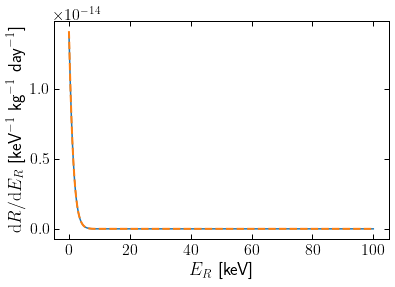

In [8]:
pl.figure(figsize=(6,4))

pl.plot(E_list, R_SI, label="Standard SI")
pl.plot(E_list, R_SI_NREFT, '--', lw=2.0, label=r'$\mathcal{O}_1$')
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')

pl.show()

------------------
# Comparing $\mathcal{O}_1$ and $\mathcal{O}_4$

Now we take a look at the spectra for $\mathcal{O}_1$ and $\mathcal{O}_4$ (standard spin-independent and spin-dependent interactions):

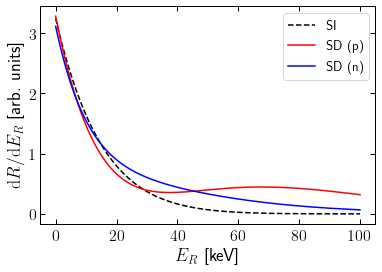

In [9]:
#Spin-independent coupling
cp_SI = np.zeros(15)
cp_SI[0] = 2.5e-5

cn_SI = 1.0*cp_SI

#Spin-dependent coupling
cp_SD = np.zeros(15)
cp_SD[3] = 1.0

cn_SD = np.zeros(15)
cn_SD[3] = 2.5e-2

m_x = 100 #DM mass in GeV

E_list = np.logspace(-3, 2,1000)

pl.figure()

pl.plot(E_list, 1e-3*DMU.dRdE_NREFT(E_list, m_x, cp_SI, cn_SI, "Xe131"),'k--' , lw=1.5,label ='SI')
pl.plot(E_list, 1e-3*DMU.dRdE_NREFT(E_list, m_x, cp_SD, 0.0*cp_SD, "Xe131"),'r-' , lw=1.5,label ='SD (p)')
pl.plot(E_list, 1e-3*DMU.dRdE_NREFT(E_list, m_x, 0.0*cn_SD, cn_SD, "Xe131"),'b-' , lw=1.5,label ='SD (n)')
pl.xlabel(r'$E_R$ [keV]')
#pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
#pl.title('Random NREFT interactions')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [arb. units]')


pl.legend(loc='best',fancybox = True)
pl.savefig("../plots/SIvsSD.pdf", bbox_inches="tight")
pl.show()

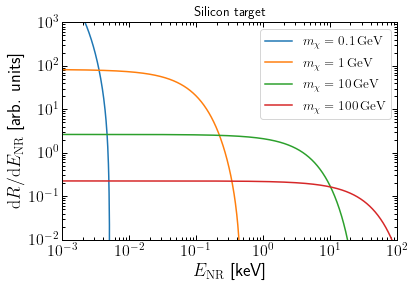

In [10]:
#Spin-independent coupling
cp_SI = np.zeros(15)
cp_SI[0] = 2.5e-5

cn_SI = 1.0*cp_SI

#Spin-dependent coupling
cp_SD = np.zeros(15)
cp_SD[3] = 1.0

cn_SD = np.zeros(15)
cn_SD[3] = 2.5e-2

#m_x = 100 #DM mass in GeV

E_list = np.logspace(-3, 2,1000)

pl.figure(figsize=(6,4))

for m_x in [0.1, 1, 10, 100]:
    #pl.loglog(E_list, 1e-3*DMU.dRdE_NREFT(E_list, m_x, cp_SI, cn_SI, "Xe131"), lw=1.5,label =r'$m_\chi = ' + str(m_x) + '\,\mathrm{GeV}$')
    pl.loglog(E_list, DMU.dRdE_standard(E_list, 28.0, 0.0, m_x, 1e-40, vlag=230.0, sigmav=156.0,vesc=544.0), lw=1.5,label =r'$m_\chi = ' + str(m_x) + '\,\mathrm{GeV}$')
        
pl.xlabel(r'$E_\mathrm{NR}$ [keV]')
#pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
#pl.title('Random NREFT interactions')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_\mathrm{NR}$ [arb. units]')

pl.xlim(1e-3, 1e2)
pl.ylim(1e-2, 1e3)

pl.title("Silicon target")
pl.legend(loc='best',fancybox = True)
pl.savefig("../plots/SI_masses_silicon.pdf", bbox_inches="tight")
pl.show()

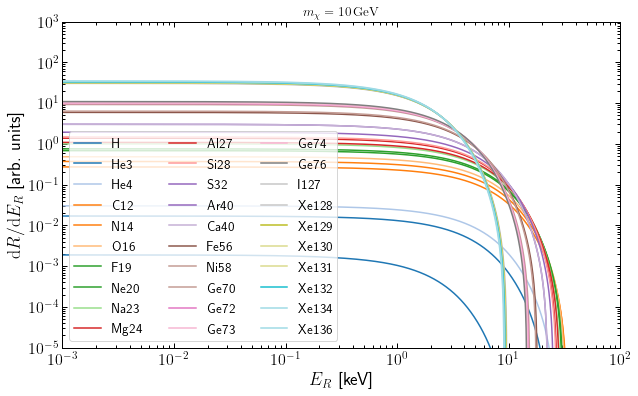

In [11]:
#Spin-independent coupling
cp_SI = np.zeros(15)
cp_SI[0] = 2.5e-5

cn_SI = 1.0*cp_SI

#Spin-dependent coupling
cp_SD = np.zeros(15)
cp_SD[3] = 1.0

cn_SD = np.zeros(15)
cn_SD[3] = 2.5e-2

m_x = 10 #DM mass in GeV

E_list = np.logspace(-3, 2,1000)

pl.figure(figsize=(10,6))

#target_labs = ["O16", "Ar40", "Ge73", "Xe131"]
target_labs = DMU.target_list
#target_labs = ["C12", "N14","O16"]
#target_labs = ["I127",]

colors = pl.cm.tab20(np.linspace(0,1,len(target_labs)))
for i, target in enumerate(target_labs):
    pl.loglog(E_list, 1e-3*DMU.dRdE_NREFT(E_list, m_x, cp_SI, cn_SI, target), lw=1.5,label =target, color=colors[i])

pl.xlabel(r'$E_R$ [keV]')
#pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
#pl.title('Random NREFT interactions')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [arb. units]')

pl.xlim(1e-3, 1e2)
pl.ylim(1e-5, 1e3)

pl.title("$m_\chi = 10\,\mathrm{GeV}$")
pl.legend(loc='best',fancybox = True, ncol=3)
pl.savefig("../plots/SI_targets.pdf", bbox_inches="tight")
pl.show()

------------
# Random NREFT spectra

Now let's try something more exotic. Let's just take some random values for all the couplings to protons and neutrons (setting the couplings to$\mathcal{O}_1$ to zero):

In [12]:
cp_random = np.random.randn(15)
cn_random = np.random.randn(15)
cp_random[0] = 0
cn_random[0] = 0
print("Couplings to protons [GeV^{-2}]:", cp_random)
print("Couplings to neutrons [GeV^{-2}]:", cn_random)

Couplings to protons [GeV^{-2}]: [ 0.          0.06573059  0.60661561  0.01787695  0.95988147 -0.57858689
 -1.80148952 -0.97435591  0.48793311  0.14785798  0.35879974  0.03026241
 -0.31531535 -0.70519452 -0.77838263]
Couplings to neutrons [GeV^{-2}]: [ 0.          1.13974478  0.57192171 -0.27291964 -1.41573566  0.02409197
 -0.91883565  0.43041769  0.09234112 -0.58892739  0.35684126 -0.81416674
 -0.18841514 -0.3548236  -0.50601959]


Now let's plot a bunch of different random spectra:

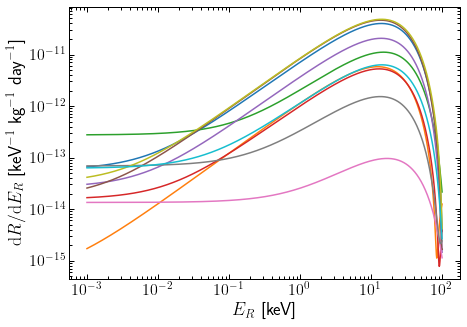

In [13]:
m_x = 100 #DM mass in GeV

E_list = np.logspace(-3, 2,1000)
R_random = np.zeros((len(E_list), 10))

pl.figure(figsize=(7,5))

for i in range(10):
    cp_random = 1e-10*np.random.randn(15)
    cn_random = 1e-10*np.random.randn(15)
    cp_random[0] = 0
    cn_random[0] = 0
    
    R_random[:,i] = DMU.dRdE_NREFT(E_list, m_x, cp_random, cn_random, "Xe131") 
    pl.loglog(E_list, np.abs(R_random[:,i]))
    
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')

pl.show()

#### Event Rates

You can also calculate the total number of events, using `Nevents_NREFT`. You have to specify a minimum and maximum energy, and you can also specify an efficiency function (i.e. the efficiency of the detector as a function of recoil energy) which multiplies the recoil rate:

In [14]:
Emin = 5 #keV
Emax = 50 #keV

#Just some made-up efficiency function
def efficiency(E_R):
    return 0.5/(1 + np.exp(-E_R))

In [15]:
print("Number of signal events per day per kg of target mass:")
print(DMU.Nevents_NREFT(Emin, Emax,  m_x, cp_random, cn_random, eff=efficiency,target="Xe131"))

Number of signal events per day per kg of target mass:
9.519269155276976e-11


-----------------
# Specific interactions

Let's look at a few specific interactions. In particular, we look at **millicharged DM**, with millicharge $\epsilon$:

$$ \mathcal{L} \supset \epsilon \overline{\chi}\gamma_\mu \chi\,A^\mu\,,$$

Dark Matter which has a **magnetic dipole moment** $\mu_\chi$:

$$ \mathcal{L} \supset\frac{\mu_\chi}{2}\overline{\chi}\sigma^{\mu \nu} \chi \,F_{\mu\nu}\,,$$

and Dark Matter which has an **anapole moment** $c_A$:

$$ \mathcal{L} \supset c_A \overline{\chi}\gamma^\mu\gamma^5\chi\,\partial^\nu F_{\mu\nu}\,.$$



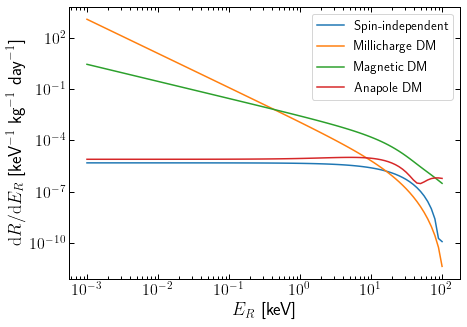

In [16]:
#Number of protons and neutrons in Xenon
A_Xe = 131.
N_p_Xe = 54.
N_n_Xe = 131 - N_p_Xe

E_list = np.logspace(-3, 2,100)

mu_x = 1e-8 # in units of the Bohr Magneton
eps = 1e-10 #in units of the electron charge
c_A = 1e-5 #in units of GeV^-2

#DM mass in GeV
m_x = 100.0

#SI cross section
sig = 1e-46

pl.figure(figsize=(7,5))
pl.loglog(E_list, DMU.dRdE_standard(E_list, N_p_Xe, N_n_Xe, m_x, sig), lw=1.5, label='Spin-independent')
pl.loglog(E_list, DMU.dRdE_millicharge(E_list, m_x, eps, "Xe131"), lw=1.5, label='Millicharge DM')
pl.loglog(E_list, DMU.dRdE_magnetic(E_list, m_x, mu_x, "Xe131"), lw=1.5, label='Magnetic DM')
pl.loglog(E_list, DMU.dRdE_anapole(E_list, m_x, c_A, "Xe131"), lw=1.5, label='Anapole DM')

pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.legend(loc = 'best')
pl.show()

----------------
# Different targets

You can specify which nucleus you want to calculate the scattering rate for using the `target` keyword. So far, we have coded in the following targets:

In [17]:
print(DMU.target_list)

['H' 'He3' 'He4' 'C12' 'N14' 'O16' 'F19' 'Ne20' 'Na23' 'Mg24' 'Al27'
 'Si28' 'S32' 'Ar40' 'Ca40' 'Fe56' 'Ni58' 'Ge70' 'Ge72' 'Ge73' 'Ge74'
 'Ge76' 'I127' 'Xe128' 'Xe129' 'Xe130' 'Xe131' 'Xe132' 'Xe134' 'Xe136']


So for example, to see the number of signal events in Carbon 12 for a given set of couplings, you just do:

In [18]:
c_SI = np.zeros(15)
c_SI[0] = 1.0

print("Number of signal events per day per kg of target mass (Carbon-12):")
print(DMU.Nevents_NREFT(E_min=1.0, E_max=100.0,  m_x=100.0, cp=c_SI, cn=c_SI, eff=None,target="C12"))

Number of signal events per day per kg of target mass (Carbon-12):
716569296213.2375


In [19]:
Np = 37
Nn = 0

from scipy.integrate import quad
quad(lambda x: x*DMU.dRdE_standard(x, Np, Nn, 50, 5e-46), 1e-1, 1e3)[0]/quad(lambda x: DMU.dRdE_standard(x, Np, Nn, 50, 5e-46), 1e-1, 1e3)[0]

19.063665932067174

----------------------------------

# Relativistic kinematics

This is not part of the full module yet - it's only just being tested:

In [20]:
import sys
sys.path.append("../WIMpy/")
import DMUtils_relativistic as DMU_rel

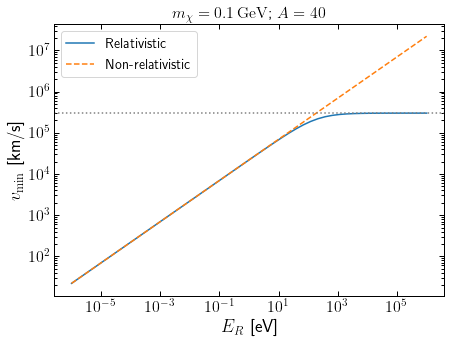

In [21]:
m_x = 0.1
m_A = 40

ER_list = np.logspace(-3, 9)

pl.figure(figsize=(7,5))

pl.loglog(1e-3*ER_list, DMU_rel.vmin_rel(ER_list, m_x, m_A), label='Relativistic')
pl.loglog(1e-3*ER_list, DMU.vmin(ER_list, m_x, m_A), linestyle='--', label='Non-relativistic')

pl.legend(fontsize=14, loc='best')

pl.xlabel(r'$E_R$ [eV]')
pl.ylabel(r'$v_\mathrm{min}$ [km/s]')

pl.axhline(3e5, color='grey', linestyle=':')
pl.title(r'$m_\chi = 0.1\,\mathrm{GeV}$; $A = 40$', fontsize=16)

pl.savefig("../plots/RelativisticKinematics.pdf", bbox_inches='tight')

pl.show()